In [1]:
import pandas as pd
import networkx as nx
import pickle 

# We can start creating the needed first graph

In [ ]:
Recent_answers=answers[(answers['Date'] >= '2016-01-01') & (answers["Active_User"] != answers["Passive_User"])].copy()

In [ ]:
Recent_answers.count()

In [ ]:
Recent_answers.isna().sum().sum()

I insert a column with the weight for each edge

In [ ]:
Recent_answers["weight"]=1

In [ ]:
Recent_answers.head()

In [ ]:
Recent_answers.groupby(["Active_User","Passive_User"]).count()

In [ ]:
g = nx.from_pandas_edgelist(Recent_answers, "Active_User", "Passive_User", edge_attr=True,edge_key="Date",create_using=nx.MultiDiGraph())

# loading the comments on questions

In [ ]:
comments_onQuestions=pd.read_csv("/Users/simone/Desktop/sx-stackoverflow-c2q.txt",sep=" ",header=None,names=['Active_User', 'Passive_User', 'Date'])

In [ ]:
comments_onQuestions.head()

In [ ]:
comments_onQuestions.count()

In [ ]:
comments_onQuestions["Date"]=pd.to_datetime(comments_onQuestions['Date'],unit='s')

In [ ]:
comments_onQuestions.head()

Selecting only the most recent comments

In [ ]:
Recent_comments_onQuestions=comments_onQuestions[(comments_onQuestions['Date'] >= '2016-01-01') & (comments_onQuestions["Active_User"] != comments_onQuestions["Passive_User"])].copy()

In [ ]:
Recent_answers.isna().sum().sum()

we insert a column to add the weight to each edge

In [ ]:
Recent_comments_onQuestions["weight"]=0.4

In [ ]:
Recent_comments_onQuestions.head()

In [ ]:
Recent_comments_onQuestions.count()

In [ ]:
g2 = nx.from_pandas_edgelist(Recent_comments_onQuestions, "Active_User", "Passive_User", edge_attr=True,edge_key="Date",create_using=nx.MultiGraph())

In [ ]:
[(n, nbrdict) for n, nbrdict in g.adjacency()]

In [ ]:
Recent_answers.isna().sum().sum()

# combining the multi-graph using the networkx library

In [ ]:
G = nx.compose(g,g2)

In [ ]:
[(n, nbrdict) for n, nbrdict in g.adjacency()]

loading all the comments on answers

In [ ]:
comments_onAnswers=pd.read_csv("/Users/simone/Desktop/sx-stackoverflow-c2a.txt",sep=" ",header=None,names=['Active_User', 'Passive_User', 'Date'])

In [ ]:
comments_onAnswers.head()

In [ ]:
comments_onAnswers["Date"]=pd.to_datetime(comments_onAnswers['Date'],unit='s')

In [ ]:
comments_onAnswers.head()

Selecting only the most recent comments

In [ ]:
Recent_comments_onAnswers=comments_onAnswers[(comments_onAnswers['Date'] >= '2016-01-01') & (comments_onAnswers["Active_User"] != comments_onAnswers["Passive_User"])].copy()

In [ ]:
Recent_comments_onAnswers.head()

In [ ]:
Recent_comments_onAnswers["weight"]=0.6

In [ ]:
Recent_comments_onAnswers.head()

In [ ]:
Recent_comments_onAnswers.count()

In [ ]:
g3 = nx.from_pandas_edgelist(Recent_comments_onAnswers, "Active_User", "Passive_User", edge_attr=True,edge_key="Date",create_using=nx.MultiGraph())

combining the multi-graph using the networkx library

In [ ]:
final_G = nx.compose(g3,G)

In [ ]:
pickle.dump(final_G, open('final_G', 'wb'))

In [ ]:
pickle.dump(g3, open('Recent_comments_onAnswers', 'wb'))

In [ ]:
pickle.dump(g, open('Recent_answers', 'wb'))

In [ ]:
pickle.dump(g2, open('Recent_comments_onQuestions', 'wb'))

# EX 2.3

Now since we are interested in the shortest walk path, we modify our graph, we make it a simple graph with interactions that happend in our desired interval, no more a multigraph.
we decided to do this because for this exercise we are interested only at the edge with the smallest weight between 2 node.
And so we create this graph for each interval of time that we need to look for.

Also we decided to rename the nodes with numbers from 0 to n with n that is equal to the number of nodes

In [11]:
import numpy as np
from heapq import heapify, heappush, heappop
from utils import first,path,check,dijkstra,new_graph,traceback,maps,links

We load the graph

In [3]:
# Load graph
with open("/Users/simone/Desktop/final_G", 'rb') as f: 
    G_loaded = pickle.load(f)

we rename the graph and we find randomly a sequence of nodes

In [4]:
dg,index=first(G_loaded)

we create the timestamps and launch the function

In [7]:
startingTime=pd.to_datetime('2016-01-01')
endTime=pd.to_datetime('2017-01-07')

In [ ]:
path(0,190,index,dg,startingTime,endTime)

booo
the path is  [(0, 334630), (334630, 152746), (152746, 242244), (242244, 158203), (158203, 241646), (241646, 376151), (376151, 190)]
0
Final_distance between 0 and 334630  3.0
[0, 645, 5983, 98292, 183761, 334630]
334630
there isn't a path between this 2 values 334630 and 152746


we check the results

In [ ]:
check(dg,0,190776,startingTime,endTime,7)

we do another example

we create the timestamps

In [8]:
startingTime=pd.to_datetime('2016-01-01')
endTime=pd.to_datetime('2018-01-01')

we create the random path and we preprocess the graph

In [ ]:
dg,index=first(G_loaded)

However this time, i want to choose a path 

In [5]:
index= [645, 1363, 14386, 85594]

In [6]:
path(0,190776,index,dg,startingTime,endTime)

booo
the path is  [(0, 645), (645, 1363), (1363, 14386), (14386, 85594), (85594, 190776)]
0
Final_distance between 0 and 645  0.4
[0, 645]
645
Final_distance between 645 and 1363  0.6
[645, 1363]
1363
Final_distance between 1363 and 14386  0.4
[1363, 14386]
14386
Final_distance between 14386 and 85594  0.4
[14386, 85594]
85594
Final_distance between 85594 and 190776  1.0
[85594, 190776]


[0, 645, 1363, 14386, 85594, 190776]

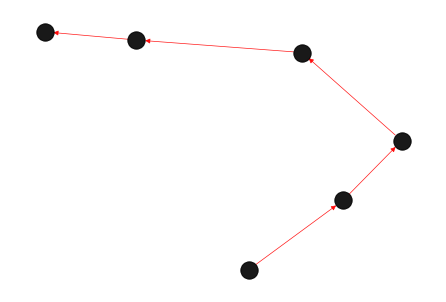

In [83]:
l=[0, 645, 1363, 14386, 85594, 190776]
path=create_path(l)
visualizePath(g,l,path)

# Functionality 4

we create the timestamps to select the intervals

In [3]:
# Load graph
with open("/Users/simone/Desktop/final_G", 'rb') as f: 
    G_loaded = pickle.load(f)

In [6]:
startingTime1=pd.to_datetime('2016-01-01')
endTime1=pd.to_datetime('2016-01-02')
startingTime2=pd.to_datetime('2016-01-06')
endTime2=pd.to_datetime('2017-01-03')

startingTime=pd.to_datetime('2016-01-01')
endTime=pd.to_datetime('2018-01-03')

first there is the step where we rename the nodes (we use the same function used for implementing djkstra)

In [4]:
dg,mapping=maps(G_loaded)

now we preprocess the saved multidigraph, also in this case it's better to keep only the edge between two nodes with the smaller weight.
So, we decided to make it a simple direct graph with edges that are interactions that happend during an interval of time

In [70]:
g=new_graph(dg,startingTime,endTime)

Now i find the two users that i need

In [ ]:
user1,user2=findUser(startingTime1,endTime1,startingTime2,endTime1,dg)

In [20]:
#it finds two users that are not in the same interval of time
def findUser(t1,t2,s1,s2,G):
    g1=new_graph(G,startingTime,endTime)
    g2=new_graph(G,startingTime,endTime)
    set1=set(g1.nodes())
    set2=set(g2.nodes())
    oneS=set1-set2
    twoS=set2-set1
    user1=oneS.pop()
    user2=twoS.pop()
    return user1,user2

Since i couldn't find the right 2 intervals of time, to get the 2 nodes,we decided to  disconnect 2 chonsen nodes from the graph

In [51]:
#it computes the number of edges we need to remove( considering their weights)
def Min_cut(G,user1,user2,startingTime,endTime):
    G=new_graph(G,startingTime,endTime)
    cost=0
    edges=[]
    while path:
        pred=dijkstra(user1,user2,G,startingTime,endTime)
        if pred[user2]==-1:
            return cost,edges
        l=traceback(pred,user2,user1)
        l=create_path(l)
        edge=find_min(l,G)
        diz=G.get_edge_data(*edge)
        cost+=diz["weight"]
        edges.append(edge)
        G.remove_edge(*edge)
    return cost,edges

In [52]:
def find_min(l,dG):
    mi=[]
    for edge in l:
        diz=dG.get_edge_data(*edge)
        cost=diz["weight"]
        mi.append((edge,cost))
    mi=sorted(mi,key= lambda x : x[1])
    return mi[0][0]    

In [53]:
def create_path(l):
    paths = iter(l)
    c=list(zip(paths, paths))
    c=links(c)
    return c    

In [ ]:
Min_cut(dg,0,85594,startingTime,endTime)

ancora qui
Final_distance between 0 and 85594  1.7999999999999998
14386
[((0, 645), 0.4), ((1363, 14386), 0.4), ((645, 1363), 0.6)]
ancora qui
